## kNN Classification

In [2]:
## Initialize Libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

sns.set(style="whitegrid", color_codes=True)
import itertools
%matplotlib inline  


In [3]:
## Define Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict


def Norm(x):
    return((x-x.mean())/x.std())

In [4]:
## Load the CSV file
data_file = 'https://raw.githubusercontent.com/db-bangs/A5016/main/d20130924_refl_ndvi_sk.csv'
crop_data = pd.read_csv(data_file, sep = ",")

In [5]:
crop_data.head()

,X,V1,V2,V3,V4,V5,V6,V7,V8,Crop,NDVI_sd,NDVI_kt,NDVI_sk,NDVI
0,1,0.08029,0.06889,0.05869,0.06374,0.10378,0.00082,0.12382,0.09167,Soybeans,0.007589,-0.652732,0.199005,0.238687
1,2,0.07644,0.06332,0.05888,0.04370,0.20840,0.00084,0.12492,0.06994,Corn,0.047886,0.441504,-0.213983,0.656629
2,3,0.07460,0.06156,0.05488,0.04416,0.18868,0.00096,0.11252,0.06026,Soybeans,0.075923,2.905492,-1.653555,0.619788
3,4,0.07514,0.06348,0.05306,0.05266,0.11797,0.00088,0.12423,0.08217,Corn,0.063182,-0.995496,-0.037232,0.380169
4,5,0.08060,0.06930,0.05936,0.06480,0.10532,0.00088,0.12530,0.09204,Soybeans,0.010109,-0.441190,0.433803,0.237682


In [6]:
## Split Data into numeric and categorical and perform One-Hot Encoding
## Column 'X' (int64) is dropped as redundant index
g=crop_data.columns.to_series().groupby(crop_data.dtypes).groups
ColumnType ={k.name: v for k, v in g.items()}

categorical_features_names=ColumnType['object']
categorical_features_names

one_hot_categorical=pd.get_dummies(crop_data[ColumnType['object']])

list_numerical_features=list(ColumnType['float64'])

numerical_features=crop_data[list_numerical_features]

X=pd.concat([numerical_features, one_hot_categorical], axis=1)
y=one_hot_categorical
X.head()  

,V1,V2,V3,V4,V5,V6,V7,V8,NDVI_sd,NDVI_kt,NDVI_sk,NDVI,Crop_Corn,Crop_Soybeans,Crop_Winter Wheat
0,0.08029,0.06889,0.05869,0.06374,0.10378,0.00082,0.12382,0.09167,0.007589,-0.652732,0.199005,0.238687,0,1,0
1,0.07644,0.06332,0.05888,0.04370,0.20840,0.00084,0.12492,0.06994,0.047886,0.441504,-0.213983,0.656629,1,0,0
2,0.07460,0.06156,0.05488,0.04416,0.18868,0.00096,0.11252,0.06026,0.075923,2.905492,-1.653555,0.619788,0,1,0
3,0.07514,0.06348,0.05306,0.05266,0.11797,0.00088,0.12423,0.08217,0.063182,-0.995496,-0.037232,0.380169,1,0,0
4,0.08060,0.06930,0.05936,0.06480,0.10532,0.00088,0.12530,0.09204,0.010109,-0.441190,0.433803,0.237682,0,1,0


#### Classification: 7 Bands

training data size: 618
testing data size: 310
time: 0.005415678024291992  sec
time: 0.04549241065979004  sec
Confusion matrix, without normalization
[[121  15  14]
 [ 18  83   9]
 [  3   3  44]]
accuracy 0.7903225806451613
precision 0.7545454545454545
recall 0.8217821782178217
F1 0.7867298578199051


C:\Users\debangs\AppData\Local\Temp\ipykernel_1276\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


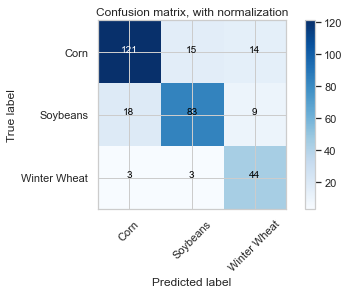

In [7]:
X = crop_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]

## Normalize the Data
X=X.apply(Norm)

## Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

k = 3
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')

startTime = time.time()

KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime = time.time()

yhat=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

np.mean(yhat==y_test)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat.argmax(axis=1),y_test.values.argmax(axis=1)),
                      classes=target_names,title='Confusion matrix, with normalization')

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
acc

metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

#### Classification 5 Bands + NDVI

training data size: 618
testing data size: 310
time: 0.004987001419067383  sec
time: 0.0332942008972168  sec
Confusion matrix, without normalization
[[120  16  16]
 [ 18  81   8]
 [  4   4  43]]
accuracy 0.7838709677419354
precision 0.7570093457943925
recall 0.801980198019802
F1 0.7788461538461539


C:\Users\debangs\AppData\Local\Temp\ipykernel_1276\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


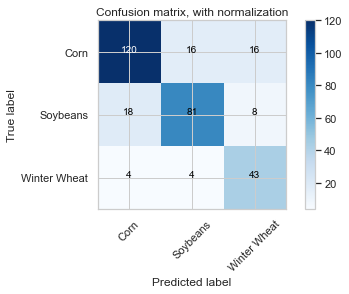

In [12]:
X = crop_data[['V1', 'V2', 'V3', 'V6', 'V7', 'NDVI']]

## Normalize the Data
X=X.apply(Norm)

## Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

k =3
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')

startTime = time.time()

# this is where we train the model 
KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime = time.time()

# this is where we make the prediction  
yhat=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

np.mean(yhat==y_test)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat.argmax(axis=1),y_test.values.argmax(axis=1)), classes=target_names,title='Confusion matrix, with normalization')

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
acc

metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

#### Classification 5 Bands + NDVI + Skew

training data size: 618
testing data size: 310
time: 0.0059816837310791016  sec
time: 0.04445052146911621  sec
Confusion matrix, without normalization
[[118  18  11]
 [ 18  78   9]
 [  6   5  47]]
accuracy 0.7677419354838709
precision 0.7428571428571429
recall 0.7722772277227723
F1 0.7572815533980582


C:\Users\debangs\AppData\Local\Temp\ipykernel_1276\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


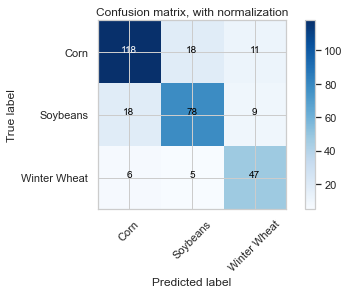

In [13]:
X = crop_data[['V1', 'V2', 'V3', 'V6', 'V7', 'NDVI', 'NDVI_sk']]

## Normalize the Data
X=X.apply(Norm)

## Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

k = 3
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')

startTime = time.time()

# this is where we train the model 
KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime = time.time()

# this is where we make the prediction  
yhat=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

np.mean(yhat==y_test)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat.argmax(axis=1),y_test.values.argmax(axis=1)), classes=target_names,title='Confusion matrix, with normalization')

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
acc

metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

#### Classification NDVI + Skew

training data size: 618
testing data size: 310
time: 0.0039882659912109375  sec
time: 0.031293392181396484  sec
Confusion matrix, without normalization
[[109  17  31]
 [ 15  75  20]
 [ 18   9  16]]
accuracy 0.6193548387096774
precision 0.6818181818181818
recall 0.7425742574257426
F1 0.7109004739336493


C:\Users\debangs\AppData\Local\Temp\ipykernel_1276\3038309493.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


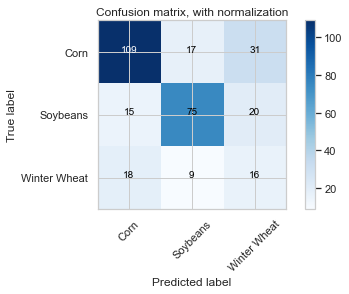

In [14]:
X = crop_data[['NDVI', 'NDVI_sk']]

## Normalize the Data
X=X.apply(Norm)

## Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

k = 3
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')

startTime = time.time()

# this is where we train the model 
KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

startTime = time.time()

# this is where we make the prediction  
yhat=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

np.mean(yhat==y_test)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat.argmax(axis=1),y_test.values.argmax(axis=1)), classes=target_names,title='Confusion matrix, with normalization')

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
acc

metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

#### Grid Search Code: Raising Errors

In [ ]:
### Grid Search
param_grid={'n_neighbors':[1,2],'algorithm':[ 'kd_tree']}

grid = GridSearchCV(KNeighborsClassifier(), cv=2, param_grid=param_grid,scoring="recall",n_jobs=-1)
print("Done")

startTime=time.time()
# this is where we fit the model 
grid.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

grid.best_params_

grid.best_score_

KNN=LR=grid.best_estimator_

startTime=time.time()
# this is where we make the prediction  
yhat=KNN.predict(X_test)


lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

NameError: name 'yhat' is not defined